In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
a = 10
b = 5
c = 2

#A = np.array([[a,c],
#              [c,b]])
A = np.eye(2,2,k=-1)*-1 + np.eye(2,2)*2 + np.eye(2,2,k=1)*-1
b = np.array([[1],
             [1]])
x0 = np.array([[ -5],
               [-10]])
r0 = b - np.matmul(A,x0)

l , v =  np.linalg.eig(A)
print(l) #affiche les valeurs propres

[3. 1.]


In [9]:
def J(x,y,A,b) :
    return 0.5*A[0,0]*x*x+A[0,1]*x*y+0.5*A[1,1]*y*y -b[0]*x-b[1]*y 

x,y = np.mgrid[-10:10:0.5,-10:10:0.5]
z = J(x,y,A,b)



In [14]:
def gradConj(Nmax,tol,A,X,R0):
    ité = 0
    d = R0
    normeR0 = np.matmul(R0.T,R0)
    evolution_residu = np.array([normeR0])
    evolution_X = [[X[0],X[1]]]
    for k in range(Nmax) :
        ité += 1
        Ad = np.matmul(A,d)
        alpha = normeR0 / np.matmul(d.T,Ad)
        X = X + alpha * d
        evolution_X = np.vstack((evolution_X,[[X[0],X[1]]]))
        R1 = R0 - alpha * Ad
        normeR1 = np.matmul(R1.T,R1)
        evolution_residu=np.vstack((evolution_residu,[normeR1]))
        if normeR1 < tol :
            break
        beta = normeR1 / normeR0
        d = R1 + beta * d
        R0 = R1
        normeR0 = normeR1
       
    return evolution_X , evolution_residu, ité

In [15]:
Nmax = 10
Xsucc, Rsucc, ité = gradConj(Nmax,1e-10,A,x0,r0)    #tableau des valeurs de X et residu au fur est à mesure de l'algo

X1 = Xsucc[:,0]    #coordonnée x
X2 = Xsucc[:,1]    #coordonnée y
normeResidu = Rsucc[:,0]
print(normeResidu)

[[2.57000000e+02]
 [7.19315482e+01]
 [3.20474743e-30]]


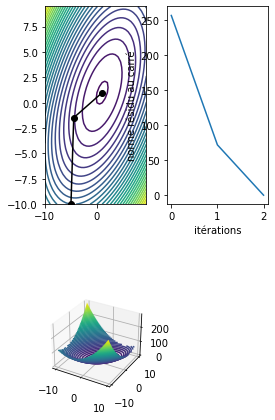

In [19]:
fig = plt.figure(figsize=plt.figaspect(2.))
ax = fig.add_subplot(2, 2, 1)
contours = ax.contour(x,y,z,30)
ax.plot(X1,X2,'k-o')

ax = fig.add_subplot(2, 2, 2)

ax.plot([k for k in range(ité+1)],normeResidu)
ax.set_xlabel("itérations")
ax.set_ylabel("norme résidu au carré")

ax = fig.add_subplot(2, 2, 3, projection='3d')
surf = ax.contour(x,y,z,50)
plt.show()